In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = {
    'Network Quality: Latency': [
        30, 60, 50, 40, 80, 55, 45, 90, 20, 35,
        70, 65, 30, 85, 75, 95, 100, 25, 15, 10,
        50, 60, 55, 45, 90, 95, 40, 30, 20, 10,
        70, 80, 85, 60, 75, 55, 90, 40, 35, 45,
        80, 75, 70, 65, 90, 25, 20, 15, 10, 5,
        100, 95, 90, 85, 80, 75, 70, 60, 50, 40,
        20, 10, 5, 15, 25, 35, 45, 55, 65, 75,
        85, 95, 100, 90, 80, 70, 60, 50, 40, 30,
        20, 10, 0, 10, 20, 30, 40, 50, 60, 70,
        80, 90, 100, 50, 40, 30, 20, 10, 5, 0
    ],
    'Network Quality: Dropped Calls': [
        0.5, 1.2, 1.0, 1.5, 2.0, 1.2, 0.8, 2.5, 0.5, 0.2,
        0.1, 0.5, 0.3, 0.4, 0.8, 0.7, 1.5, 1.8, 1.0, 0.9,
        0.6, 0.4, 0.2, 0.3, 0.7, 0.5, 0.4, 0.6, 0.8, 1.0,
        0.2, 0.3, 0.5, 0.6, 0.7, 1.2, 1.4, 1.0, 0.8, 0.9,
        0.5, 0.4, 0.2, 0.3, 0.7, 0.1, 0.2, 0.3, 0.5, 0.4,
        0.8, 0.6, 0.7, 0.5, 0.4, 0.2, 0.1, 0.3, 0.4, 0.2,
        1.0, 0.9, 0.8, 0.6, 0.7, 0.5, 0.3, 0.1, 0.2, 0.5,
        0.3, 0.4, 0.2, 0.1, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0,
        0.6, 0.7, 0.8, 0.9, 1.0, 0.5, 0.4, 0.3, 0.2, 0.1,
        0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
    ],
    'Internet Usage (GB)': [
        5, 20, 15, 30, 25, 10, 40, 35, 50, 5,
        10, 20, 15, 25, 30, 35, 40, 45, 50, 5,
        10, 20, 30, 40, 10, 5, 15, 20, 10, 15,
        20, 30, 40, 50, 5, 10, 15, 25, 35, 45,
        50, 40, 35, 30, 25, 20, 15, 10, 5, 0,
        10, 20, 30, 40, 50, 5, 10, 20, 15, 25,
        30, 40, 35, 50, 10, 5, 15, 20, 25, 30,
        40, 35, 30, 25, 20, 15, 10, 5, 0, 5,
        10, 15, 20, 25, 30, 35, 40, 50, 55, 60,
        20, 30, 40, 50, 5, 10, 15, 25, 35, 45
    ],
    'Network Quality: Data Drops': [
        0.1, 0.3, 0.2, 0.5, 0.4, 0.1, 0.2, 0.3, 0.5, 0.1,
        0.2, 0.1, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.1,
        0.3, 0.4, 0.5, 0.2, 0.1, 0.3, 0.4, 0.2, 0.1, 0.3,
        0.4, 0.2, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.1, 0.2,
        0.1, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4, 0.1, 0.2, 0.3,
        0.5, 0.4, 0.2, 0.1, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3,
        0.4, 0.2, 0.1, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4,
        0.2, 0.1, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.1,
        0.2, 0.1, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5,
        0.1, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4, 0.1, 0.2, 0.3
    ],
    'Churn': [
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 0
    ]
}

df = pd.DataFrame(data)

np.random.seed(42)
df['Age'] = np.random.randint(18, 71, size=len(df))

df['Gender'] = np.random.choice([0, 1], size=len(df))

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.65
Precision: 0.60
Recall: 0.67
F1 Score: 0.63


Let's improve our performance by first doing correlation analysis for feature selection.

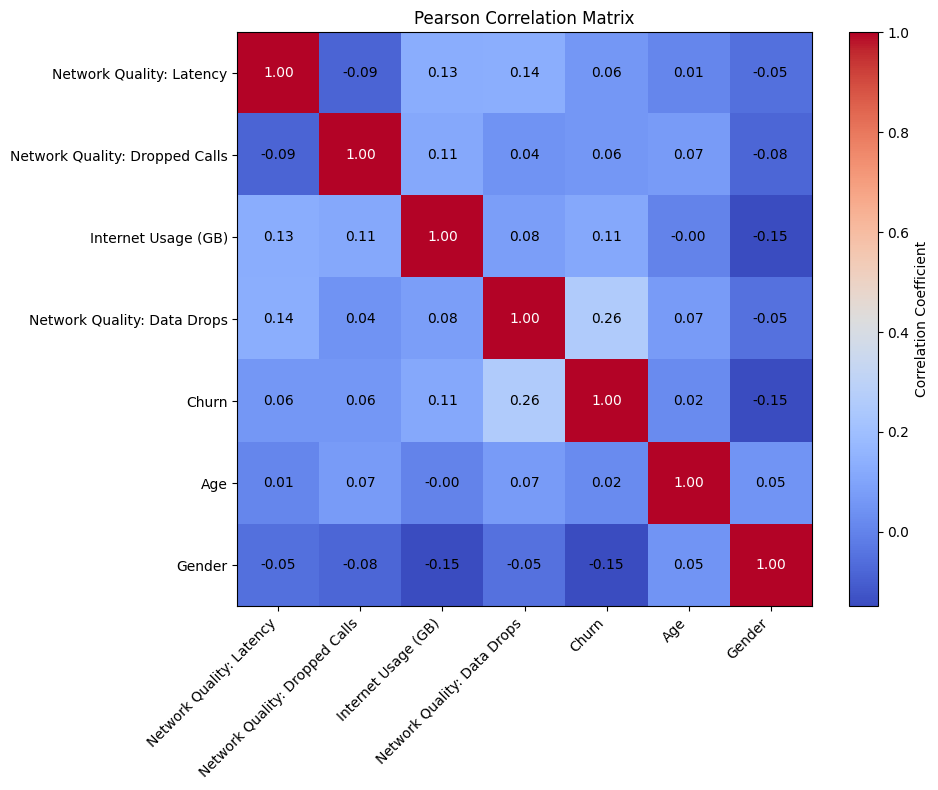

In [2]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix.values):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) > 0.5 else 'black')

plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

We can drop age and gender because they do not seem to be correlated with churn.

In [3]:
data = {
    'Network Quality: Latency': [
        30, 60, 50, 40, 80, 55, 45, 90, 20, 35,
        70, 65, 30, 85, 75, 95, 100, 25, 15, 10,
        50, 60, 55, 45, 90, 95, 40, 30, 20, 10,
        70, 80, 85, 60, 75, 55, 90, 40, 35, 45,
        80, 75, 70, 65, 90, 25, 20, 15, 10, 5,
        100, 95, 90, 85, 80, 75, 70, 60, 50, 40,
        20, 10, 5, 15, 25, 35, 45, 55, 65, 75,
        85, 95, 100, 90, 80, 70, 60, 50, 40, 30,
        20, 10, 0, 10, 20, 30, 40, 50, 60, 70,
        80, 90, 100, 50, 40, 30, 20, 10, 5, 0
    ],
    'Network Quality: Dropped Calls': [
        0.5, 1.2, 1.0, 1.5, 2.0, 1.2, 0.8, 2.5, 0.5, 0.2,
        0.1, 0.5, 0.3, 0.4, 0.8, 0.7, 1.5, 1.8, 1.0, 0.9,
        0.6, 0.4, 0.2, 0.3, 0.7, 0.5, 0.4, 0.6, 0.8, 1.0,
        0.2, 0.3, 0.5, 0.6, 0.7, 1.2, 1.4, 1.0, 0.8, 0.9,
        0.5, 0.4, 0.2, 0.3, 0.7, 0.1, 0.2, 0.3, 0.5, 0.4,
        0.8, 0.6, 0.7, 0.5, 0.4, 0.2, 0.1, 0.3, 0.4, 0.2,
        1.0, 0.9, 0.8, 0.6, 0.7, 0.5, 0.3, 0.1, 0.2, 0.5,
        0.3, 0.4, 0.2, 0.1, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0,
        0.6, 0.7, 0.8, 0.9, 1.0, 0.5, 0.4, 0.3, 0.2, 0.1,
        0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9
    ],
    'Internet Usage (GB)': [
        5, 20, 15, 30, 25, 10, 40, 35, 50, 5,
        10, 20, 15, 25, 30, 35, 40, 45, 50, 5,
        10, 20, 30, 40, 10, 5, 15, 20, 10, 15,
        20, 30, 40, 50, 5, 10, 15, 25, 35, 45,
        50, 40, 35, 30, 25, 20, 15, 10, 5, 0,
        10, 20, 30, 40, 50, 5, 10, 20, 15, 25,
        30, 40, 35, 50, 10, 5, 15, 20, 25, 30,
        40, 35, 30, 25, 20, 15, 10, 5, 0, 5,
        10, 15, 20, 25, 30, 35, 40, 50, 55, 60,
        20, 30, 40, 50, 5, 10, 15, 25, 35, 45
    ],
    'Network Quality: Data Drops': [
        0.1, 0.3, 0.2, 0.5, 0.4, 0.1, 0.2, 0.3, 0.5, 0.1,
        0.2, 0.1, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.1,
        0.3, 0.4, 0.5, 0.2, 0.1, 0.3, 0.4, 0.2, 0.1, 0.3,
        0.4, 0.2, 0.3, 0.1, 0.5, 0.4, 0.3, 0.2, 0.1, 0.2,
        0.1, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4, 0.1, 0.2, 0.3,
        0.5, 0.4, 0.2, 0.1, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3,
        0.4, 0.2, 0.1, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4,
        0.2, 0.1, 0.3, 0.4, 0.5, 0.2, 0.3, 0.4, 0.5, 0.1,
        0.2, 0.1, 0.3, 0.4, 0.5, 0.1, 0.2, 0.3, 0.4, 0.5,
        0.1, 0.3, 0.4, 0.5, 0.3, 0.2, 0.4, 0.1, 0.2, 0.3
    ],
    'Churn': [
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 0
    ]
}

df = pd.DataFrame(data)

X = df.drop(columns=['Churn'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.65
Precision: 0.60
Recall: 0.67
F1 Score: 0.63


Let's scale the data so that all features are on a comparable scale.

In [4]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.70
Precision: 0.71
Recall: 0.56
F1 Score: 0.62
